### Week3 文字分析
##### 3-1 文字前處理
##### 3-2 文字雲
##### 3-3 詞袋模型
##### 3-4 TF-IDF
##### 3-5 詞嵌入模型
##### 3-6 文字相似度計算
##### 3-7 文字分群
##### 3-8 社群網路文字分析作業引導

### 3-1 文字前處理
<p>將Series 連接成一個字串</p>
<p><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.cat.html">pandas series str cat</a></p>

In [7]:
import pandas as pd
lib = pd.read_excel('library20181022.xlsx')
titles = lib["主題"].str.cat(sep=' ')
print(titles[:50])

以Turnitin自我檢測論文內容之原創性 不可不知的學位論文著作權 論文簡報：說一個精采的故事 [


<p><a href="https://stackoverflow.com/questions/3801431/python-any-way-to-perform-this-hybrid-split-on-multi-lingual-e-g-chinese">拆分中文與英文字串</a></p>

In [10]:
import re
def group_words(s):
    return re.findall("[\u4e00-\u9fff]|[a-zA-Z0-9]+", s)

words = group_words(titles)
print(words[:50])

['以', 'Turnitin', '自', '我', '檢', '測', '論', '文', '內', '容', '之', '原', '創', '性', '不', '可', '不', '知', '的', '學', '位', '論', '文', '著', '作', '權', '論', '文', '簡', '報', '說', '一', '個', '精', '采', '的', '故', '事', '閱', '讀', '素', '養', '研', '習', '坊', '歷', '史', '知', '識', '與']


In [13]:
def get_word_count(words):
    outputs = dict()
    for word in words:
        if word in outputs:
            outputs[word] += 1
        else:
            outputs[word] = 1
    
    return outputs

def print_dict(dicts, n):
    count = 0
    for key, value in dicts.items():
        count += 1
        if count < n:
            print(key, value)
count = get_word_count(words)
print_dict(count, 20)

以 7
Turnitin 12
自 5
我 10
檢 5
測 3
論 69
文 115
內 4
容 3
之 12
原 8
創 22
性 4
不 17
可 10
知 12
的 56
學 207


#### n-gram

In [16]:
# 以function實作n-gram
def get_ngrams(words, n):
    output = []
    for i in range(len(words)-n+1):
        output.append(words[i:i+n])
    return output

In [18]:
# 2-grams
n_grams = get_ngrams(words, 2)
print("2-grams:{}".format(n_grams[:10]))
# 3-grams
n_grams = get_ngrams(words, 3)
print("3-grams:{}".format(n_grams[:10]))
# 4-grams
n_grams = get_ngrams(words, 4)
print("4-grams:{}".format(n_grams[:10]))


2-grams:[['以', 'Turnitin'], ['Turnitin', '自'], ['自', '我'], ['我', '檢'], ['檢', '測'], ['測', '論'], ['論', '文'], ['文', '內'], ['內', '容'], ['容', '之']]
3-grams:[['以', 'Turnitin', '自'], ['Turnitin', '自', '我'], ['自', '我', '檢'], ['我', '檢', '測'], ['檢', '測', '論'], ['測', '論', '文'], ['論', '文', '內'], ['文', '內', '容'], ['內', '容', '之'], ['容', '之', '原']]
4-grams:[['以', 'Turnitin', '自', '我'], ['Turnitin', '自', '我', '檢'], ['自', '我', '檢', '測'], ['我', '檢', '測', '論'], ['檢', '測', '論', '文'], ['測', '論', '文', '內'], ['論', '文', '內', '容'], ['文', '內', '容', '之'], ['內', '容', '之', '原'], ['容', '之', '原', '創']]


### 計算ngram出現次數

from collections import OrderedDict

def get_ngrams_count(words, n):
    output = dict()
    for i in range(len(words)-n+1):
        string = "".join(words[i:i+n])
        if string in output:
            output[string] += 1
        else:
            output[string] = 1
    return output

In [54]:
n_grams = get_ngrams_count(words, 2)

order = OrderedDict(sorted(n_grams.items(), key=lambda t: t[1], reverse=True))
print_dict(order, 10)

資源 68
論文 66
資料 66
料庫 52
介紹 49
研究 48
課程 43
說明 39
額滿 36


### 3-2文字雲

In [49]:
from wordcloud import WordCloud
from matplotlib.font_manager import FontProperties
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

myfont = FontProperties(fname=r"NotoSerifCJKtc-Black.otf")
sns.set(font=myfont.get_family())
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})

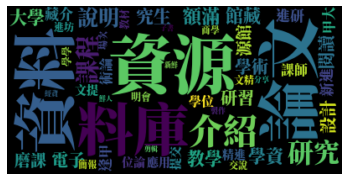

In [57]:
plt.figure()
wordcloud = WordCloud(font_path='NotoSerifCJKtc-Black.otf',max_words=50).generate_from_frequencies(n_grams)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### 結巴練習

In [58]:
# encoding=utf-8
import jieba

seg_list = jieba.cut("我從高雄來到台中，就讀逢甲大學", cut_all=False) #全模式
print("全模式: " + ", ".join(seg_list))

seg_list = jieba.cut("我從高雄來到台中，就讀逢甲大學", cut_all=True) #精確模式
print("精確模式: " + ", ".join(seg_list))

seg_list = jieba.cut_for_search("小明碩士畢業於逢甲大學資工所，後在日本京都大學深造") #搜尋引擎模式
print("搜尋引擎模式: "+ ", ".join(seg_list))

全模式: 我, 從, 高雄, 來到, 台, 中, ，, 就讀, 逢甲大學
精確模式: 我, 從, 高, 雄, 來到, 台中, ，, 就讀, 逢甲, 逢甲大學, 大學
搜尋引擎模式: 小明, 碩士, 畢業, 於, 逢甲, 大學, 逢甲大學, 資工, 所, ，, 後, 在, 日本, 京都, 大學, 日本京都大學, 深造


In [59]:
import pandas as pd
lib = pd.read_excel('library20181022.xlsx')
titles = lib["主題"].str.cat(sep=' ')
segment = list(jieba.cut(titles))
print(segment[:10])

['以', 'Turnitin', '自我', '檢測', '論文', '內容', '之', '原創性', ' ', '不可']


In [60]:
jieba.load_userdict("dict.txt.big")
segment = list(jieba.cut(titles))
print(segment[:10])

['以', 'Turnitin', '自我', '檢測', '論文', '內容', '之', '原創性', ' ', '不可']


#### 3-2 程式練習

In [66]:
from wordcloud import WordCloud
from matplotlib.font_manager import FontProperties
from matplotlib import pyplot as plt
import seaborn as sns
import jieba
import pandas as pd
%matplotlib inline

lib = pd.read_excel('library20181022.xlsx')
titles = lib["主題"].str.cat(sep=' ')
jieba.load_userdict("dict.txt.big")
segment = list(jieba.cut(titles))
seg_text = " ".join(segment)

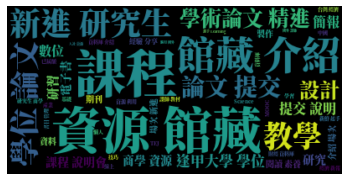

In [67]:
plt.figure()
wordcloud = WordCloud(font_path='NotoSerifCJKtc-Black.otf',max_words=50).generate(seg_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### 3-3 Bag of words

In [6]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

text_data = ["I want to eat ice cream.", 
             "I don’t want to eat ice.", 
             "You and I can do sometings.",
            "They want to go to library."]

count = CountVectorizer(min_df=0)
bag_of_words = count.fit_transform(text_data)
bag_of_words.toarray()

array([[0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 0]], dtype=int64)

In [7]:
feature_names = count.get_feature_names()
pd.DataFrame(bag_of_words.toarray(), columns=feature_names)

,and,can,cream,do,don,eat,go,ice,library,sometings,they,to,want,you
0,0,0,1,0,0,1,0,1,0,0,0,1,1,0
1,0,0,0,0,1,1,0,1,0,0,0,1,1,0
2,1,1,0,1,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,1,0,1,0,1,2,1,0


#### Not use bog of words library

In [60]:
import numpy as np
import pandas as pd
import re

def find_all_english(string):
    return re.findall("[a-zA-Z]+", string)

bag_of_words = list()

text_data = ["I want to eat ice cream.", 
             "I don’t want to eat ice.", 
             "You and I can do sometings.",
            "They want to go to library."]

In [61]:
for text in text_data:
    text = find_all_english(text)
    for t in text:
        if (t not in bag_of_words):
            bag_of_words.append(t)
bag_of_words = sorted(bag_of_words)
print(bag_of_words)

['I', 'They', 'You', 'and', 'can', 'cream', 'do', 'don', 'eat', 'go', 'ice', 'library', 'sometings', 't', 'to', 'want']


In [62]:
counts_words_list = []
for text in text_data:
    temp_count = np.zeros((len(bag_of_words)), dtype=np.int).tolist()
    text = find_all_english(text)
    for t in text:
        if t in bag_of_words:
            index = bag_of_words.index(t)
            temp_count[index] += 1

    counts_words_list.append(temp_count)
    print(temp_count)


[1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1]
[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1]
[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1]


In [63]:
counts_words_list = np.array(counts_words_list)
pd.DataFrame(counts_words_list, columns=bag_of_words)

,I,They,You,and,can,cream,do,don,eat,go,ice,library,sometings,t,to,want
0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1
1,1,0,0,0,0,0,0,1,1,0,1,0,0,1,1,1
2,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,1,0,1,0,0,2,1


#### 3-4 TF-IDF

In [64]:
from math import log

def tf(term, doc, normalize=True):
    doc = doc.lower().split()
    if normalize:
        result = doc.count(term.lower()) / float(len(doc))
    else:
        result = doc.count(term.lower()) / 1
    return result

In [65]:
def idf(term, docs):
    
    num_text_with_term = len([True for doc in docs if term.lower() in doc.lower().split()])
    
    try:
        return 1.0 + log(len(docs) / num_text_with_term)
    except ZeroDivisionError:
        return 1.0

def tf_idf(term, doc, docs):
    return tf(term, doc) * idf(term, docs)

In [66]:
corpus = \
    {'a': 'Mr. Green killed Colonel Mustard in the study with the candlestick. Mr. Green is not a very nice fellow.',
     'b': 'Professor Plumb has a green plant in his study ',
     'c': "Miss Scarlett watered Professor Plumb's green plant while he was away from his office last week."}

terms = {
 'a' : [ i.lower() for i in corpus['a'].split() ],
 'b' : [ i.lower() for i in corpus['b'].split() ],
 'c' : [ i.lower() for i in corpus['c'].split() ]
 }

terms

{'a': ['mr.',
  'green',
  'killed',
  'colonel',
  'mustard',
  'in',
  'the',
  'study',
  'with',
  'the',
  'candlestick.',
  'mr.',
  'green',
  'is',
  'not',
  'a',
  'very',
  'nice',
  'fellow.'],
 'b': ['professor',
  'plumb',
  'has',
  'a',
  'green',
  'plant',
  'in',
  'his',
  'study'],
 'c': ['miss',
  'scarlett',
  'watered',
  'professor',
  "plumb's",
  'green',
  'plant',
  'while',
  'he',
  'was',
  'away',
  'from',
  'his',
  'office',
  'last',
  'week.']}

In [71]:
# Score queries by calculating cumulative tf_idf score for each term in query
QUERY_TERMS = ['green']

query_scores = {'a': 0, 'b': 0, 'c': 0}
for term in [t.lower() for t in QUERY_TERMS]:
    for doc in sorted(corpus):
        print ('TF(%s): %s' % (doc, term), tf(term, corpus[doc]))
    print ('IDF: %s' % (term, ), idf(term, corpus.values()))
    print()

    for doc in sorted(corpus):
        score = tf_idf(term, corpus[doc], corpus.values())
        print ('TF-IDF(%s): %s' % (doc, term), score)
        # 將tf*idf相加 
        query_scores[doc] += score
    print()

print ("Overall TF-IDF scores for query '%s'" % (' '.join(QUERY_TERMS), ))
for (doc, score) in sorted(query_scores.items()):
    print (doc, score)

TF(a): green 0.10526315789473684
TF(b): green 0.1111111111111111
TF(c): green 0.0625
IDF: green 1.0

TF-IDF(a): green 0.10526315789473684
TF-IDF(b): green 0.1111111111111111
TF-IDF(c): green 0.0625

Overall TF-IDF scores for query 'green'
a 0.10526315789473684
b 0.1111111111111111
c 0.0625


#### 使用NLTK 計算TF-IDF

In [72]:
import nltk
text = [text for text in terms.values()]
tc = nltk.TextCollection(text)
term = 'green'
idx = 0
print ('TF(%s): %s' % ('a', term), tc.tf(term,text[idx]))
# If a term does not appear in the corpus, 0.0 is returned.
print ('IDF(%s): %s' % ('a', term), tc.idf(term))
print ('TF-IDF(%s): %s' % ('a', term), tc.tf_idf(term,text[idx]))

TF(a): green 0.10526315789473684
IDF(a): green 0.0
TF-IDF(a): green 0.0


### 3-5 詞嵌入模型

#### 馬可夫模型
<p><a href="https://kknews.cc/zh-tw/news/p5vk6a2.html">文字檔</a></p>

In [4]:
with open("test.txt", encoding="utf-8") as f:
    sentences = f.readlines()

sentences = [s.strip() for s in sentences]
sentences

['生活其實很簡單，過了今天就是明天。那些正在熬的，是會成為人生里明朗的印跡。人生平靜便是福，平靜生活，真實而洒脫。簡單的事，想深了，就複雜了。這世界上，有一種心情叫承重，舉得起放得下的叫舉重，舉得起放不下的叫負重。',
 '幸福其實很簡單，也就是兩個字：自然。這世界上，有一種心情叫承重，舉得起放得下的叫舉重，舉得起放不下的叫負重。人生，最重要的不是得失，而是擁有一顆善待自己的平常心。',
 '有些事，你真別看清，看清，心痛；有些人，你真別看懂，看懂，傷情。淡然的心態，是人生的成熟。簡單的事，想深了，就複雜了。這世界上，有一種心情叫承重，舉得起放得下的叫舉重，舉得起放不下的叫負重。用加法的方式去愛人，用減法的方式去怨恨，用乘法的方式去感恩。',
 '人生，看透不如看淡。這世界上，有一種心情叫承重，舉得起放得下的叫舉重，舉得起放不下的叫負重。與其擔心未來，不如現在好好努力。調整心態，保持好心情是很重要的。 不管什麼樣的困難，不管什麼樣的挫折，總會有雨過天晴的時候，憂傷和埋怨解決不了任何問題，唯有積極面對。',
 '不喜歡就不要選擇，喜歡了就要堅持。在一起是一種緣分，不要輕易讓喜歡你的人哭泣傷心，好好珍惜在一起的每一分鐘，美好的回憶應該留給快樂和歡笑。無論遇到什麼事情，都不要輕易說不喜歡，因為，下一站的人未必更好。舉得起放得下的叫舉重，舉得起放不下的叫負重。可惜，大多數人的愛情，都是負重的。']

##### 斷句

In [5]:
import re
import string

delims = [
                 "，", "。", "；", "：", "！",
                 "?", "？", ";", ":", "!",
                 ",", ".", "\"", "'", "“",
                 "‘", "’", "(", ")", "”",
                 "（", "）", "%", "％", "@",
                 "~", "`", "～", "｀", "#",
                 "、", "/", "\\", "<", ">",
                 "《", "》", "／", "｛", "｝",
                 "{", "}", "[", "]", "［",
                 "］", "|", "｜", "\n", "\r",
                 " ", "\t", "　", '+','=','*','^','·'
             ]\
            + list("0123456789") \
            + list(string.punctuation)
print(delims)
escaped = re.escape(''.join(delims))
exclusions = '['+escaped+']'
print(exclusions)
splitsen = []
for s in sentences:
    cleans = re.sub(exclusions, ' ', s)
    subs= cleans.split()
    splitsen.extend(subs)
print(splitsen)

['，', '。', '；', '：', '！', '?', '？', ';', ':', '!', ',', '.', '"', "'", '“', '‘', '’', '(', ')', '”', '（', '）', '%', '％', '@', '~', '`', '～', '｀', '#', '、', '/', '\\', '<', '>', '《', '》', '／', '｛', '｝', '{', '}', '[', ']', '［', '］', '|', '｜', '\n', '\r', ' ', '\t', '\u3000', '+', '=', '*', '^', '·', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']
[，。；：！\?？;:!,\."'“‘’\(\)”（）%％@\~`～｀\#、/\\<>《》／｛｝\{\}\[\]［］\|｜\
\ \	　\+=\*\^·0123456789!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~]
['生活其實很簡單', '過了今天就是明天', '那些正在熬的', '是會成為人生里明朗的印跡', '人生平靜便是福', '平靜生活', '真實而洒脫', '簡單的事', '想深了', '就複雜了', '這世界上', '有一種心情叫承重', '舉得起放得下的叫舉重', '舉得起放不下的叫負重', '幸福其實很簡單', '也就是兩個字', '自然', '這世界上', '有一種心情叫承重', '舉得起放得下的叫舉重', '舉得起放不下的叫負重', '人生', '最重要的不是得失', '而是擁有一顆善待自己的平常心', '有些事', '你真別看清', '看清', '心痛', '有些人', '你真別看懂', '看懂', '傷情', '淡然的心態', '是人生的成熟', '簡單的事', '想深了', '

In [6]:
for idx, s in enumerate(splitsen):
    splitsen[idx] = 'S'+s+"E"
print(splitsen)

['S生活其實很簡單E', 'S過了今天就是明天E', 'S那些正在熬的E', 'S是會成為人生里明朗的印跡E', 'S人生平靜便是福E', 'S平靜生活E', 'S真實而洒脫E', 'S簡單的事E', 'S想深了E', 'S就複雜了E', 'S這世界上E', 'S有一種心情叫承重E', 'S舉得起放得下的叫舉重E', 'S舉得起放不下的叫負重E', 'S幸福其實很簡單E', 'S也就是兩個字E', 'S自然E', 'S這世界上E', 'S有一種心情叫承重E', 'S舉得起放得下的叫舉重E', 'S舉得起放不下的叫負重E', 'S人生E', 'S最重要的不是得失E', 'S而是擁有一顆善待自己的平常心E', 'S有些事E', 'S你真別看清E', 'S看清E', 'S心痛E', 'S有些人E', 'S你真別看懂E', 'S看懂E', 'S傷情E', 'S淡然的心態E', 'S是人生的成熟E', 'S簡單的事E', 'S想深了E', 'S就複雜了E', 'S這世界上E', 'S有一種心情叫承重E', 'S舉得起放得下的叫舉重E', 'S舉得起放不下的叫負重E', 'S用加法的方式去愛人E', 'S用減法的方式去怨恨E', 'S用乘法的方式去感恩E', 'S人生E', 'S看透不如看淡E', 'S這世界上E', 'S有一種心情叫承重E', 'S舉得起放得下的叫舉重E', 'S舉得起放不下的叫負重E', 'S與其擔心未來E', 'S不如現在好好努力E', 'S調整心態E', 'S保持好心情是很重要的E', 'S不管什麼樣的困難E', 'S不管什麼樣的挫折E', 'S總會有雨過天晴的時候E', 'S憂傷和埋怨解決不了任何問題E', 'S唯有積極面對E', 'S不喜歡就不要選擇E', 'S喜歡了就要堅持E', 'S在一起是一種緣分E', 'S不要輕易讓喜歡你的人哭泣傷心E', 'S好好珍惜在一起的每一分鐘E', 'S美好的回憶應該留給快樂和歡笑E', 'S無論遇到什麼事情E', 'S都不要輕易說不喜歡E', 'S因為E', 'S下一站的人未必更好E', 'S舉得起放得下的叫舉重E', 'S舉得起放不下的叫負重E', 'S可惜E', 'S大多數人的愛情E', 'S都是負重的E']


In [7]:
import jieba
jieba.load_userdict('dict.txt.big')
words = []
for s in splitsen:
    ws = list(jieba.cut(s))
    words.extend(ws)
print(len(words))
print(words[:10])

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\x1996\AppData\Local\Temp\jieba.cache
Loading model cost 0.639 seconds.
Prefix dict has been built successfully.


457
['S', '生活', '其實', '很', '簡單', 'E', 'S', '過了', '今天', '就是']


In [10]:
def build_word_dict(words):
    
    word_dict = {}
    for i in range(1, len(words)):
        if words[i-1] not in word_dict:
            word_dict[words[i-1]] = {}
        if words[i] not in word_dict[words[i-1]]:
            word_dict[words[i-1]][words[i]] = 0
        word_dict[words[i-1]][words[i]] += 1
    
    return word_dict

word_dict = build_word_dict(words)
print(word_dict["生活"])

{'其實': 1, 'E': 1}


In [11]:
from random import randint

# 算總次數
def wordListSum(wordList):
    sumfreq = 0
    for word, freq in wordList.items():
        sumfreq += freq
    #print(sumfreq)
    return sumfreq

# 依照機率分布，隨機產生下一個字
def retrieveRandomWord(wordList):
    #print(wordList)
    # 1~n 取亂數
    randIndex = randint(1, wordListSum(wordList))
    for word, freq in wordList.items():
        randIndex -= freq
        if randIndex <= 0:
            return word

In [15]:
# 產生長度100的Markov chain
length = 100
chain = ""
currentWord = "生活"
for i in range(0, length):
    chain += currentWord+""
    #print(wordDict[currentWord])
    currentWord = retrieveRandomWord(word_dict[currentWord])

print(chain)

生活ES想深了ES幸福其實很重要的印跡ES人生ES在一起的困難ES舉得起放不下的事ES你的叫舉重ES人生的叫舉重ES有一種緣分ES簡單的事ES舉得起放得下一站的人ES用加法的叫舉重ES用乘法的心態ES不管什麼樣的平常心ES舉得起放不下的不是得失ES這世界上ES想深了ES因為


In [16]:
import re
reply = re.split('S|E',chain)
reply = [s for s in reply if s != '']
reply

['生活',
 '想深了',
 '幸福其實很重要的印跡',
 '人生',
 '在一起的困難',
 '舉得起放不下的事',
 '你的叫舉重',
 '人生的叫舉重',
 '有一種緣分',
 '簡單的事',
 '舉得起放得下一站的人',
 '用加法的叫舉重',
 '用乘法的心態',
 '不管什麼樣的平常心',
 '舉得起放不下的不是得失',
 '這世界上',
 '想深了',
 '因為']

### 3-6 詞相似度
#### 餘弦相似度

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

corpus = [
    'Mr. Green killed Colonel Mustard in the study with the candlestick. Mr. Green is not a very nice fellow.',
    'Professor Plumb has a green plant in his study.',
    "Miss Scarlett watered Professor Plumb's green plant while he was away from his office last week."
]

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
print(tfidf_matrix[0:1])

  (0, 3)	0.2205828828763741
  (0, 16)	0.2205828828763741
  (0, 25)	0.2205828828763741
  (0, 17)	0.2205828828763741
  (0, 10)	0.2205828828763741
  (0, 1)	0.2205828828763741
  (0, 30)	0.2205828828763741
  (0, 23)	0.1677589680512606
  (0, 24)	0.4411657657527482
  (0, 9)	0.1677589680512606
  (0, 15)	0.2205828828763741
  (0, 2)	0.2205828828763741
  (0, 11)	0.2205828828763741
  (0, 5)	0.26055960805891015
  (0, 14)	0.4411657657527482


In [2]:
print(cosine_similarity(tfidf_matrix[0:1], tfidf_matrix))
print(cosine_similarity(tfidf_matrix[1:2], tfidf_matrix))
print(cosine_similarity(tfidf_matrix[2:3], tfidf_matrix))

[[1.         0.18633706 0.04163403]]
[[0.18633706 1.         0.32811415]]
[[0.04163403 0.32811415 1.        ]]


### 3-7 分群

#### K-means clustering
https://medium.com/@a4793706/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-k-means-clustering-in-python-%E9%99%84%E7%A8%8B%E5%BC%8F%E7%A2%BC%E4%BB%8B%E7%B4%B9-55c19bcf2280

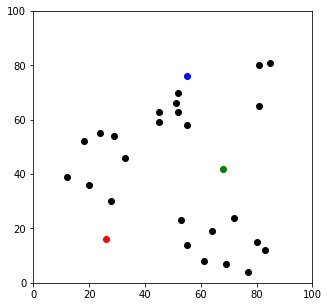

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline

df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52 ,55, 53, 55, 61, 64, 69, 72, 77, 81, 83, 80, 81, 85],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24, 4, 65, 12, 15, 80 ,81]
})

np.random.seed(200) # 打亂順序
k = 3
centroids = {
    i+1:[np.random.randint(0, 100), np.random.randint(0, 100)] for i in range(k)
}

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {
    1: 'r', 2:'g', 3:'b'
}

for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

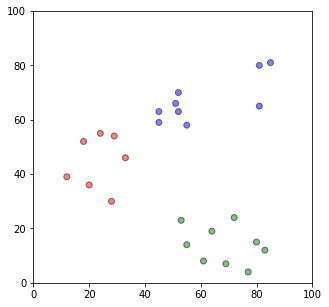

In [54]:
def assignment(df, centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] =(
            np.sqrt((df['x'] - centroids[i][0])**2 + (df['y'] - centroids[i][1])**2)
        )
    
    centroids_distance_cols = ["distance_from_{}".format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroids_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip("distance_from_")))
    df['color'] = df['closest'].map(lambda x:colmap[x])
    return df

df = assignment(df, centroids)

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolors='k')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

{1: [23.428571428571427, 44.57142857142857], 2: [68.22222222222223, 14.0], 3: [60.77777777777778, 67.22222222222223]}
{1: [23.428571428571427, 44.57142857142857], 2: [68.22222222222223, 14.0], 3: [60.77777777777778, 67.22222222222223]}


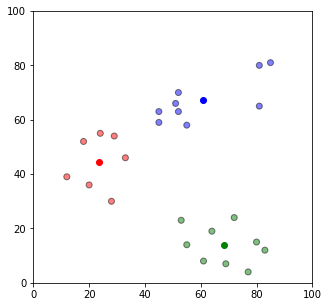

In [55]:
old_centeroids = copy.deepcopy(centroids)

def update(centroids):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return centroids

centroids = update(centroids)
print(centroids)
print(old_centeroids)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolors='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 100)
plt.ylim(0, 100)

for i in old_centeroids.keys():
    old_x = old_centeroids[i][0]
    old_y = old_centeroids[i][1]
    dx = (centroids[i][0] - old_centeroids[i][0]) ** 0.75
    dy = (centroids[i][1] - old_centeroids[i][1]) ** 0.75
    #ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

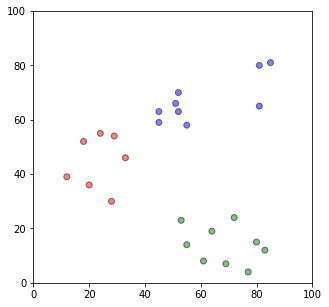

In [56]:
df = assignment(df, centroids)

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolors='k')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

{1: [23.428571428571427, 44.57142857142857], 2: [68.22222222222223, 14.0], 3: [60.77777777777778, 67.22222222222223]}
{1: [23.428571428571427, 44.57142857142857], 2: [68.22222222222223, 14.0], 3: [60.77777777777778, 67.22222222222223]}


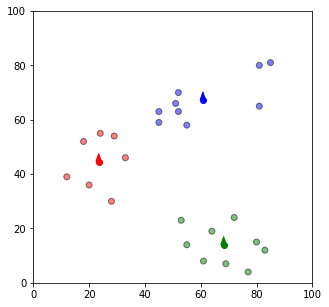

In [57]:
centroids = update(centroids)
print(centroids)
print(old_centeroids)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolors='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 100)
plt.ylim(0, 100)

for i in old_centeroids.keys():
    old_x = old_centeroids[i][0]
    old_y = old_centeroids[i][1]
    dx = (centroids[i][0] - old_centeroids[i][0]) ** 0.75
    dy = (centroids[i][1] - old_centeroids[i][1]) ** 0.75
    #ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

### 3-8 社群網路文字分析作業引導
<p><a href="https://zh.wikipedia.org/wiki/Wikipedia:%E6%95%B0%E6%8D%AE%E5%BA%93%E4%B8%8B%E8%BD%BD">資料集下載</a></p>
<p><a href="https://clay-atlas.com/blog/2020/01/17/python-chinese-tutorial-gensim-word2vec/">參考網站</a></p>

In [1]:
from gensim.corpora import WikiCorpus
import jieba
from opencc import OpenCC
from gensim.models import word2vec


wiki_corpus = WikiCorpus('zhwiki-20200601-pages-articles-multistream.xml.bz2', dictionary={})
text_num = 0

with open('wiki_text.txt', 'w', encoding='utf-8') as f:
    for text in wiki_corpus.get_texts():
        f.write(' '.join(text)+'\n')
        text_num+=1
        if text_num % 10000 == 0:
            print('{} articles processed.'.format(text_num))
            break
    print('{} articles processed.'.format(text_num))

c:\users\fcu234\anaconda3\envs\ta\lib\site-packages\gensim\utils.py:1268: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected %s; aliasing chunkize to chunkize_serial" % entity)


10000 articles processed.
10000 articles processed.


In [2]:
use_transation = OpenCC("s2t")

with open("wiki_text.txt", "r", encoding='utf-8') as f:
    train_data = f.read()
    train_data = use_transation.convert(train_data)
    train_data = jieba.lcut(train_data)
print("Finish read wiki_text.txt file")

train_data = [word for word in train_data if word != '']
train_data = ' '.join(train_data)

with open("seg.txt", "w",  encoding='utf-8') as f:
    f.write(train_data)

print("Finish writing seg.txt file")

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\x1996\AppData\Local\Temp\jieba.cache
Loading model cost 0.521 seconds.
Prefix dict has been built successfully.


Finish read wiki_text.txt file
Finish writing seg.txt file


In [3]:
# Settings
seed = 600
sg = 0
window_size = 10
vector_size = 100
min_count = 1
workers = 8
epochs = 5
batch_words = 500

train_data = word2vec.LineSentence('seg.txt')
model = word2vec.Word2Vec(
    train_data,
    min_count=min_count,
    size=vector_size,
    workers=workers,
    iter=epochs,
    window=window_size,
    sg=sg,
    seed=seed,
    batch_words=batch_words)
model.save('word2vec.model')

In [4]:
model = word2vec.Word2Vec.load('word2vec.model')
print(model['諾貝爾'].shape)

for item in model.most_similar('諾貝爾'):
    print(item)

c:\users\fcu234\anaconda3\envs\ta\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
c:\users\fcu234\anaconda3\envs\ta\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.


(100,)
('諾貝爾獎', 0.8800222277641296)
('學獎', 0.8714039325714111)
('該獎', 0.871219277381897)
('得主', 0.8592882752418518)
('獲得諾', 0.8482877016067505)
('諾貝爾化', 0.8386493921279907)
('年諾貝爾', 0.8379590511322021)
('貝爾獎', 0.8338898420333862)
('科學獎', 0.7996233701705933)
('獲獎者', 0.7869561314582825)
